In [39]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,roc_curve,precision_score,recall_score,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter
import seaborn as sns
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier



In [40]:
def metric(y_test,y_pred):
    cm=confusion_matrix(y_test, y_pred)
    tp=cm[1][1] #vrai positifs 
    tn=cm[0][0] #vrai negatifs
    fp=cm[0][1] #faux positifs
    fn=cm[1][0] #faux negatifs
    score=(2*((tp+tn)/y_test.size) + 5*(tp/(fn+tp)))/7 #(2*accuracy + 5*rappel)/7
#     print(f"score : {score} soit {score* 100:.2f}%")
    return float(score)

In [41]:
from sklearn.neighbors import KNeighborsClassifier
def KNN_CL(X_tr,y_tr,X_ts,y_ts):
    voisins.append(i+1)
    knn = KNeighborsClassifier(n_neighbors = 1)
    knn.fit(X_tr, y_tr)
    y_pred = knn.predict(X_ts)
    print('Precision : {0:0.5f}'.format(precision_score(y_ts , y_pred)))
    print('Recall : {0:0.5f}'.format(recall_score(y_ts , y_pred)))
    print('F1 : {0:0.5f}'.format(f1_score(y_ts , y_pred)))
    print('roc_auc_score : {0:0.5f}'.format(roc_auc_score(y_ts , y_pred)))
    print('metrique personnalisée : {0:0.5f}'.format(metric(y_ts,y_pred)))
    #matrice de confusion
    print(f"\\\\Matrice de confusion ///:- \n {confusion_matrix(y_ts, y_pred)}")
    sns.heatmap(pd.DataFrame(confusion_matrix(y_ts, y_pred)), annot=True, annot_kws={"size": 15}, cmap="winter" ,fmt='g')
    plt.title('Matrice de confusion', y=1.1, fontsize = 15)
    plt.xlabel('Prédit',fontsize = 15)
    plt.ylabel('Réel',fontsize = 15)
    plt.show()



Precision : 0.85000
Recall : 0.84158
F1 : 0.84577
roc_auc_score : 0.92066
metrique personnalisée : 0.88669
\\Matrice de confusion ///:- 
 [[56846    15]
 [   16    85]]


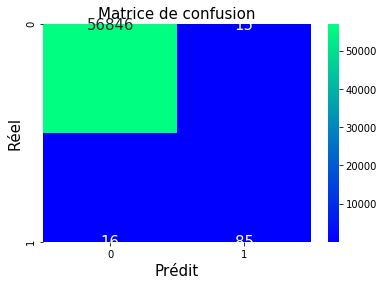

KeyboardInterrupt: 

In [42]:
df = pd.read_csv('creditcard.csv').astype(np.float32)
Sc=StandardScaler()
Amount=df["Amount"].values
df["Amount"]=Sc.fit_transform(Amount.reshape(-1,1))
Time=df["Time"].values
df["Time"]=Sc.fit_transform(Time.reshape(-1,1))
x = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

KNN_CL(X_train,Y_train,X_test,Y_test)